# Perceptron

In [1]:
import matplotlib.pyplot as plt

# This is a bit of magic to make matplotlib figures appear inline in the
# notebook rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
# import the necessary packages
import numpy as np

class Perceptron:
    def __init__(self, N, alpha=0.1):
        # initialize the weight matrix and store the learning rate
        self.W = np.random.randn(N + 1) / np.sqrt(N)
        self.alpha = alpha
        
    def step(self, x):
        # apply the step function
        return 1 if x > 0 else 0
    
    def fit(self, X, y, epochs=10):
        # insert a column of 1’s as the last entry in the feature matrix
        # this little trick allows us to treat the bias as a trainable parameter within the weight matrix
        X = np.c_[X, np.ones((X.shape[0]))]
        
        # loop over the desired number of epochs
        for epoch in np.arange(0, epochs):
            # loop over each individual data point
            for (x, target) in zip(X, y):
                # take the dot product between the input features and the weight matrix
                # then pass this value through the step function to obtain the prediction
                p = self.step(np.dot(x, self.W))
                
                # only perform a does not match
                if p != target:
                    # determine the error
                    error = p - target
                    
                    # update the weight matrix
                    self.W += - self.alpha * error * x
                    
    def predict(self, X, addBias=True):
        # ensure our input is a matrix
        X = np.atleast_2d(X)
        
        # check to see if the bias column should be added
        if addBias:
            # insert a column of 1’s as the last entry in the feature matrix (bias)
            X = np.c_[X, np.ones((X.shape[0]))]
            
        # take the dot product between the input features and the weight matrix, 
        # then pass the value through the step function
        return self.step(np.dot(X, self.W))

In [3]:
# import the necessary packages
import numpy as np

# construct the OR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [1]])

# define our perceptron and train it
print("[INFO] training perceptron...")
p = Perceptron(X.shape[1], alpha=0.1)
p.fit(X, y, epochs=20)

# now that our perceptron is trained we can evaluate it
print("[INFO] testing perceptron...")

# now that our network is trained, loop over the data points
for (x, target) in zip(X, y):
    # make a prediction on the data point and display the result to our console
    pred = p.predict(x)
    print("[INFO] data={}, ground-truth={}, pred={}".format(x, target[0], pred))

[INFO] training perceptron...
[INFO] testing perceptron...
[INFO] data=[0 0], ground-truth=0, pred=0
[INFO] data=[0 1], ground-truth=1, pred=1
[INFO] data=[1 0], ground-truth=1, pred=1
[INFO] data=[1 1], ground-truth=1, pred=1


In [4]:
# construct the AND dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [0], [0], [1]])

# define our perceptron and train it
print("[INFO] training perceptron...")
p = Perceptron(X.shape[1], alpha=0.1)
p.fit(X, y, epochs=20)

# now that our perceptron is trained we can evaluate it
print("[INFO] testing perceptron...")

# now that our network is trained, loop over the data points
for (x, target) in zip(X, y):
    # make a prediction on the data point and display the result to our console
    pred = p.predict(x)
    print("[INFO] data={}, ground-truth={}, pred={}".format(x, target[0], pred))

[INFO] training perceptron...
[INFO] testing perceptron...
[INFO] data=[0 0], ground-truth=0, pred=0
[INFO] data=[0 1], ground-truth=0, pred=0
[INFO] data=[1 0], ground-truth=0, pred=0
[INFO] data=[1 1], ground-truth=1, pred=1


In [5]:
# construct the XOR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# define our perceptron and train it
print("[INFO] training perceptron...")
p = Perceptron(X.shape[1], alpha=0.1)
p.fit(X, y, epochs=20)

# now that our perceptron is trained we can evaluate it
print("[INFO] testing perceptron...")

# now that our network is trained, loop over the data points
for (x, target) in zip(X, y):
    # make a prediction on the data point and display the result to our console
    pred = p.predict(x)
    print("[INFO] data={}, ground-truth={}, pred={}".format(x, target[0], pred))

[INFO] training perceptron...
[INFO] testing perceptron...
[INFO] data=[0 0], ground-truth=0, pred=1
[INFO] data=[0 1], ground-truth=1, pred=1
[INFO] data=[1 0], ground-truth=1, pred=0
[INFO] data=[1 1], ground-truth=0, pred=0


# Neural Networks Backpropagation

In [6]:
# import the necessary packages
import numpy as np

class NeuralNetwork:
    def __init__(self, layers, alpha=0.1):
        # initialize the list of weights matrices, then store the
        # network architecture and learning rate
        self.W = []
        self.layers = layers
        self.alpha = alpha
        
        # start looping from the index of the first layer but
        # stop before we reach the last two layers
        for i in np.arange(0, len(layers) - 2):
            # randomly initialize a weight matrix connecting the
            # number of nodes in each respective layer together,
            # adding an extra node for the bias
            w = np.random.randn(layers[i] + 1, layers[i + 1] + 1)
            self.W.append(w / np.sqrt(layers[i]))
            
        # the last two layers are a special case where the input
        # connections need a bias term but the output does not
        w = np.random.randn(layers[-2] + 1, layers[-1])
        self.W.append(w / np.sqrt(layers[-2]))
        
    def __repr__(self):
        # construct and return a string that represents the network
        # architecture
        return "NeuralNetwork: {}".format(
        "-".join(str(l) for l in self.layers))
    
    def sigmoid(self, x):
        # compute and return the sigmoid activation value for a given input value
        return 1.0 / (1 + np.exp(-x))
    
    def sigmoid_deriv(self, x):
        # compute the derivative of the sigmoid function ASSUMING
        # that ‘x‘ has already been passed through the ‘sigmoid‘ function
        return x * (1 - x)
    
    def fit(self, X, y, epochs=1000, displayUpdate=100):
        # insert a column of 1’s as the last entry in the feature
        # matrix -- this little trick allows us to treat the bias
        # as a trainable parameter within the weight matrix
        X = np.c_[X, np.ones((X.shape[0]))]
        
        # loop over the desired number of epochs
        for epoch in np.arange(0, epochs):
            # loop over each individual data point and train our network on it
            for (x, target) in zip(X, y):
                self.fit_partial(x, target)
                
            # check to see if we should display a training update
            if epoch == 0 or (epoch + 1) % displayUpdate == 0:
                loss = self.calculate_loss(X, y)
                print("[INFO] epoch={}, loss={:.7f}".format(epoch + 1, loss))
            
    def fit_partial(self, x, y):
        # construct our list of output activations for each layer
        # as our data point flows through the network; the first
        # activation is a special case -- it’s just the input
        # feature vector itself
        A = [np.atleast_2d(x)]
        
        # FEEDFORWARD:
        # loop over the layers in the network
        for layer in np.arange(0, len(self.W)):
            # feedforward the activation at the current layer by
            # taking the dot product between the activation and
            # the weight matrix -- this is called the "net input"
            # to the current layer
            net = A[layer].dot(self.W[layer])
            
            # computing the "net output" is simply applying our
            # nonlinear activation function to the net input
            out = self.sigmoid(net)
            
            # once we have the net output, add it to our list of activations
            A.append(out)
            
        # BACKPROPAGATION
        # the first phase of backpropagation is to compute the
        # difference between our *prediction* (the final output
        # activation in the activations list) and the true target value
        error = A[-1] - y

        # from here, we need to apply the chain rule and build our
        # list of deltas ‘D‘; the first entry in the deltas is
        # simply the error of the output layer times the derivative
        # of our activation function for the output value
        D = [error * self.sigmoid_deriv(A[-1])]

        # once you understand the chain rule it becomes super easy
        # to implement with a ‘for‘ loop -- simply loop over the
        # layers in reverse order (ignoring the last two since we
        # already have taken them into account)
        for layer in np.arange(len(A) - 2, 0, -1):
            # the delta for the current layer is equal to the delta
            # of the *previous layer* dotted with the weight matrix
            # of the current layer, followed by multiplying the delta
            # by the derivative of the nonlinear activation function
            # for the activations of the current layer
            delta = D[-1].dot(self.W[layer].T)
            delta = delta * self.sigmoid_deriv(A[layer])
            D.append(delta)

        # since we looped over our layers in reverse order we need to
        # reverse the deltas
        D = D[::-1]
        
        # WEIGHT UPDATE PHASE
        # loop over the layers
        for layer in np.arange(0, len(self.W)):
            # update our weights by taking the dot product of the layer
            # activations with their respective deltas, then multiplying
            # this value by some small learning rate and adding to our
            # weight matrix -- this is where the actual "learning" takes place
            self.W[layer] += -self.alpha * A[layer].T.dot(D[layer])

    def predict(self, X, addBias=True):
        # initialize the output prediction as the input features -- this
        # value will be (forward) propagated through the network to
        # obtain the final prediction
        p = np.atleast_2d(X)
        
        # check to see if the bias column should be added
        if addBias:
            # insert a column of 1’s as the last entry in the feature
            # matrix (bias)
            p = np.c_[p, np.ones((p.shape[0]))]
            
        # loop over our layers in the network
        for layer in np.arange(0, len(self.W)):
            # computing the output prediction is as simple as taking
            # the dot product between the current activation value ‘p‘
            # and the weight matrix associated with the current layer,
            # then passing this value through a nonlinear activation function
            p = self.sigmoid(np.dot(p, self.W[layer]))
            
        # return the predicted value
        return p
    
    def calculate_loss(self, X, targets):
        # make predictions for the input data points then compute
        # the loss
        targets = np.atleast_2d(targets)
        predictions = self.predict(X, addBias=False)
        loss = 0.5 * np.sum((predictions - targets) ** 2)
        
        # return the loss
        return loss

In [7]:
# import the necessary packages
import numpy as np

# construct the XOR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# define our 2-2-1 neural network and train it
nn = NeuralNetwork([2, 2, 1], alpha=0.5)
nn.fit(X, y, epochs=1000)

# now that our network is trained, loop over the XOR data points
for (x, target) in zip(X, y):
    # make a prediction on the data point and display the result
    # to our console
    pred = nn.predict(x)[0][0]
    step = 1 if pred > 0.5 else 0
    print("[INFO] data={}, ground-truth={}, pred={:.4f}, step={}".format(x, target[0], pred, step))

[INFO] epoch=1, loss=0.5058698
[INFO] epoch=100, loss=0.4951916
[INFO] epoch=200, loss=0.4800092
[INFO] epoch=300, loss=0.4450414
[INFO] epoch=400, loss=0.3904945
[INFO] epoch=500, loss=0.3392974
[INFO] epoch=600, loss=0.2984970
[INFO] epoch=700, loss=0.2662135
[INFO] epoch=800, loss=0.2404139
[INFO] epoch=900, loss=0.2197513
[INFO] epoch=1000, loss=0.2032481
[INFO] data=[0 0], ground-truth=0, pred=0.1145, step=0
[INFO] data=[0 1], ground-truth=1, pred=0.8165, step=1
[INFO] data=[1 0], ground-truth=1, pred=0.8073, step=1
[INFO] data=[1 1], ground-truth=0, pred=0.5680, step=1


# MNIST

In [8]:
# import the necessary packages
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import datasets

In [9]:
# load the MNIST dataset and apply min/max scaling to scale the
# pixel intensity values to the range [0, 1] (each image is
# represented by an 8 x 8 = 64-dim feature vector)
print("[INFO] loading MNIST (sample) dataset...")
digits = datasets.load_digits()
data = digits.data.astype("float")
data = (data - data.min()) / (data.max() - data.min())
print("[INFO] samples: {}, dim: {}".format(data.shape[0], data.shape[1]))

[INFO] loading MNIST (sample) dataset...
[INFO] samples: 1797, dim: 64


In [10]:
# construct the training and testing splits
(trainX, testX, trainY, testY) = train_test_split(data, digits.target, test_size=0.25)

# convert the labels from integers to vectors
trainY = LabelBinarizer().fit_transform(trainY)
testY = LabelBinarizer().fit_transform(testY)

In [11]:
# train the network
print("[INFO] training network...")
nn = NeuralNetwork([trainX.shape[1], 32, 16, 10])
print("[INFO] {}".format(nn))
nn.fit(trainX, trainY, epochs=1000)

[INFO] training network...
[INFO] NeuralNetwork: 64-32-16-10
[INFO] epoch=1, loss=605.4590468
[INFO] epoch=100, loss=7.2728669
[INFO] epoch=200, loss=3.8953319
[INFO] epoch=300, loss=2.8611948
[INFO] epoch=400, loss=1.9033830
[INFO] epoch=500, loss=1.3080763
[INFO] epoch=600, loss=1.2198717
[INFO] epoch=700, loss=1.1723066
[INFO] epoch=800, loss=1.1376956
[INFO] epoch=900, loss=0.6512183
[INFO] epoch=1000, loss=0.6205620


In [12]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = nn.predict(testX)
predictions = predictions.argmax(axis=1)
print(classification_report(testY.argmax(axis=1), predictions))

[INFO] evaluating network...
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      0.98      0.99        46
           2       1.00      1.00      1.00        44
           3       0.97      1.00      0.99        38
           4       0.98      0.98      0.98        47
           5       0.96      0.98      0.97        49
           6       0.97      1.00      0.99        39
           7       1.00      0.98      0.99        49
           8       0.98      0.95      0.96        43
           9       0.93      0.93      0.93        41

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



# Neural Networks with Keras

In [13]:
# import the necessary packages
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.
/home/pedro/anaconda3/envs/computer-vision/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/pedro/anaconda3/envs/computer-vision/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/pedro/anaconda3/envs/computer-vision/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1

In [16]:
# grab the MNIST dataset (if this is your first time running this
# script, the download may take a minute -- the 55MB MNIST dataset
# will be downloaded)
print("[INFO] loading MNIST (full) dataset...")
dataset = datasets.fetch_mldata("MNIST Original")
# scale the raw pixel intensities to the range [0, 1.0], then
# construct the training and testing splits
data = dataset.data.astype("float") / 255.0
(trainX, testX, trainY, testY) = train_test_split(data, dataset.target, test_size=0.25)

[INFO] loading MNIST (full) dataset...


/home/pedro/anaconda3/envs/computer-vision/lib/python3.6/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)
/home/pedro/anaconda3/envs/computer-vision/lib/python3.6/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)


In [17]:
# convert the labels from integers to vectors
labelBinarizer = LabelBinarizer()
trainY = labelBinarizer.fit_transform(trainY)
testY = labelBinarizer.transform(testY)

In [18]:
# define the 784-256-128-10 architecture using Keras
model = Sequential()
model.add(Dense(256, input_shape=(784,), activation="sigmoid"))
model.add(Dense(128, activation="sigmoid"))
model.add(Dense(10, activation="softmax"))

In [19]:
# train the model using SGD
print("[INFO] training network...")
sgd = SGD(0.01)
model.compile(loss="categorical_crossentropy", optimizer=sgd,
metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=100, batch_size=128)

[INFO] training network...
Train on 52500 samples, validate on 17500 samples
Epoch 1/100
52500/52500 [==============================] - 8s 153us/step - loss: 2.2776 - acc: 0.2068 - val_loss: 2.2461 - val_acc: 0.3274
Epoch 2/100
52500/52500 [==============================] - 1s 12us/step - loss: 2.2147 - acc: 0.3720 - val_loss: 2.1815 - val_acc: 0.4854
Epoch 3/100
52500/52500 [==============================] - 1s 12us/step - loss: 2.1402 - acc: 0.5010 - val_loss: 2.0953 - val_acc: 0.5290
Epoch 4/100
52500/52500 [==============================] - 1s 12us/step - loss: 2.0380 - acc: 0.5641 - val_loss: 1.9744 - val_acc: 0.5502
Epoch 5/100
52500/52500 [==============================] - 1s 12us/step - loss: 1.8963 - acc: 0.6047 - val_loss: 1.8111 - val_acc: 0.6290
Epoch 6/100
52500/52500 [==============================] - 1s 12us/step - loss: 1.7157 - acc: 0.6406 - val_loss: 1.6181 - val_acc: 0.6618
Epoch 7/100
52500/52500 [==============================] - 1s 12us/step - loss: 1.5196 - acc: 

52500/52500 [==============================] - 1s 12us/step - loss: 0.3273 - acc: 0.9060 - val_loss: 0.3293 - val_acc: 0.9054
Epoch 60/100
52500/52500 [==============================] - 1s 12us/step - loss: 0.3256 - acc: 0.9070 - val_loss: 0.3282 - val_acc: 0.9049
Epoch 61/100
52500/52500 [==============================] - 1s 12us/step - loss: 0.3239 - acc: 0.9071 - val_loss: 0.3261 - val_acc: 0.9063
Epoch 62/100
52500/52500 [==============================] - 1s 12us/step - loss: 0.3222 - acc: 0.9075 - val_loss: 0.3244 - val_acc: 0.9070
Epoch 63/100
52500/52500 [==============================] - 1s 12us/step - loss: 0.3206 - acc: 0.9076 - val_loss: 0.3228 - val_acc: 0.9070
Epoch 64/100
52500/52500 [==============================] - 1s 12us/step - loss: 0.3189 - acc: 0.9082 - val_loss: 0.3214 - val_acc: 0.9075
Epoch 65/100
52500/52500 [==============================] - 1s 13us/step - loss: 0.3174 - acc: 0.9090 - val_loss: 0.3201 - val_acc: 0.9078
Epoch 66/100
52500/52500 [==============

In [21]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=128)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), 
                            target_names=[str(x) for x in labelBinarizer.classes_]))

[INFO] evaluating network...
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.95      1695
         1.0       0.95      0.96      0.96      2004
         2.0       0.92      0.89      0.90      1747
         3.0       0.91      0.88      0.89      1808
         4.0       0.92      0.93      0.93      1718
         5.0       0.89      0.87      0.88      1638
         6.0       0.94      0.95      0.94      1729
         7.0       0.93      0.94      0.93      1761
         8.0       0.88      0.90      0.89      1628
         9.0       0.90      0.90      0.90      1772

    accuracy                           0.92     17500
   macro avg       0.92      0.92      0.92     17500
weighted avg       0.92      0.92      0.92     17500



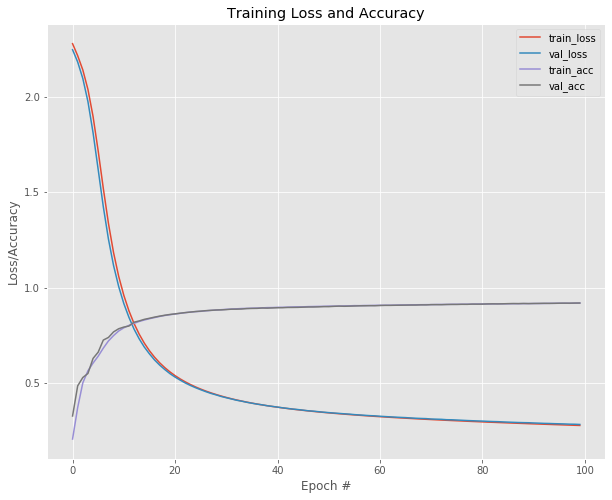

In [22]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 100), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

# CIFAR-10

In [23]:
# import the necessary packages
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

In [26]:
# load the training and testing data, scale it into the range [0, 1],
# then reshape the design matrix
print("[INFO] loading CIFAR-10 data...")
((trainX, trainY), (testX, testY)) = cifar10.load_data()
trainX = trainX.astype("float") / 255.0
testX = testX.astype("float") / 255.0
trainX = trainX.reshape((trainX.shape[0], 3072))
testX = testX.reshape((testX.shape[0], 3072))

[INFO] loading CIFAR-10 data...


In [27]:
# convert the labels from integers to vectors
labelBinarizer = LabelBinarizer()
trainY = labelBinarizer.fit_transform(trainY)
testY = labelBinarizer.transform(testY)

# initialize the label names for the CIFAR-10 dataset
labelNames = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [28]:
# define the 3072-1024-512-10 architecture using Keras
model = Sequential()
model.add(Dense(1024, input_shape=(3072,), activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [29]:
# train the model using SGD
print("[INFO] training network...")
sgd = SGD(0.01)
model.compile(loss="categorical_crossentropy", optimizer=sgd,
metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=100, batch_size=32)

[INFO] training network...
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 5s 93us/step - loss: 1.8407 - acc: 0.3423 - val_loss: 1.6998 - val_acc: 0.3957
Epoch 2/100
50000/50000 [==============================] - 4s 88us/step - loss: 1.6505 - acc: 0.4154 - val_loss: 1.7105 - val_acc: 0.3860
Epoch 3/100
50000/50000 [==============================] - 4s 88us/step - loss: 1.5711 - acc: 0.4459 - val_loss: 1.5746 - val_acc: 0.4400
Epoch 4/100
50000/50000 [==============================] - 4s 88us/step - loss: 1.5122 - acc: 0.4643 - val_loss: 1.5667 - val_acc: 0.4408
Epoch 5/100
50000/50000 [==============================] - 4s 90us/step - loss: 1.4646 - acc: 0.4831 - val_loss: 1.5638 - val_acc: 0.4356
Epoch 6/100
50000/50000 [==============================] - 5s 91us/step - loss: 1.4237 - acc: 0.4981 - val_loss: 1.4587 - val_acc: 0.4806
Epoch 7/100
50000/50000 [==============================] - 4s 89us/step - loss: 1.3875 - acc: 0

50000/50000 [==============================] - 4s 87us/step - loss: 0.3220 - acc: 0.8998 - val_loss: 1.6685 - val_acc: 0.5508
Epoch 60/100
50000/50000 [==============================] - 4s 88us/step - loss: 0.3046 - acc: 0.9029 - val_loss: 1.7500 - val_acc: 0.5389
Epoch 61/100
50000/50000 [==============================] - 4s 88us/step - loss: 0.2914 - acc: 0.9095 - val_loss: 1.9515 - val_acc: 0.5143
Epoch 62/100
50000/50000 [==============================] - 4s 87us/step - loss: 0.2772 - acc: 0.9127 - val_loss: 1.7885 - val_acc: 0.5478
Epoch 63/100
50000/50000 [==============================] - 4s 87us/step - loss: 0.2692 - acc: 0.9170 - val_loss: 1.9379 - val_acc: 0.5288
Epoch 64/100
50000/50000 [==============================] - 4s 87us/step - loss: 0.2544 - acc: 0.9226 - val_loss: 1.8913 - val_acc: 0.5373
Epoch 65/100
50000/50000 [==============================] - 4s 88us/step - loss: 0.2451 - acc: 0.9259 - val_loss: 1.7934 - val_acc: 0.5525
Epoch 66/100
50000/50000 [==============

In [30]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=labelNames))

[INFO] evaluating network...
              precision    recall  f1-score   support

    airplane       0.63      0.63      0.63      1000
  automobile       0.67      0.68      0.67      1000
        bird       0.44      0.47      0.46      1000
         cat       0.39      0.38      0.39      1000
        deer       0.51      0.48      0.49      1000
         dog       0.45      0.48      0.47      1000
        frog       0.63      0.60      0.61      1000
       horse       0.62      0.60      0.61      1000
        ship       0.72      0.67      0.69      1000
       truck       0.59      0.65      0.62      1000

    accuracy                           0.56     10000
   macro avg       0.57      0.56      0.56     10000
weighted avg       0.57      0.56      0.56     10000



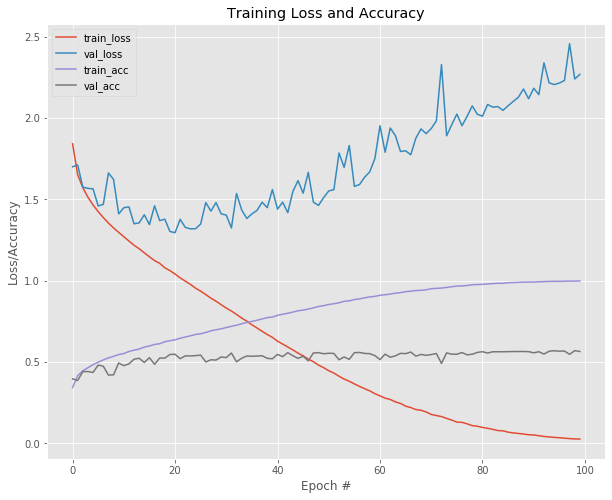

In [35]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 100), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()